In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# HW 1: Direct Methods for the solution of Linear Systems

### Some helper functions used in the experiments

In [2]:
def compute_metrics(A, x_true):
    # 1.1 Compute right-hand side y = Ax_true
    y = np.dot(A, x_true)
    
    # 1.2 Compute condition numbers and check ill-conditioning
    cond_2_norm = np.linalg.cond(A, 2)
    cond_inf_norm = np.linalg.cond(A, np.inf)
    
    # 1.3 Solve the linear system Ax = y
    x_computed = np.linalg.solve(A, y)
    
    # 1.4 Compute relative error between true and computed solution
    relative_error = np.linalg.norm(x_computed - x_true, 2) / np.linalg.norm(x_true, 2)
    
    return cond_2_norm, cond_inf_norm, relative_error

def plot_results(results, matrix_type):
    n_values = results["n"]

    _, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot relative error
    axs[0].plot(n_values, results["rel_error"], 'o-', label='Relative Error')
    axs[0].set_xlabel('n')
    axs[0].set_ylabel('Relative Error')
    axs[0].set_title(f'Relative Error of a {matrix_type} matrix')
    axs[0].grid(True)
    axs[0].legend()

    # Plot condition numbers in log scale
    axs[1].plot(n_values, results["cond_2"], 'o-', label='Condition Number (2-norm)')
    axs[1].plot(n_values, results["cond_inf"], 's-', label='Condition Number (Infinity norm)')
    axs[1].set_xlabel('n')
    axs[1].set_ylabel('Condition Number')
    axs[1].set_title(f'Condition Numbers of a {matrix_type} matrix')
    axs[1].set_yscale('log')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

The condition number of a matrix provides an indication of how stable the matrix A is, or how significantly the output may change in response to small changes in the input, for invertible matrixes it can be evaluated as $$ k_p(A) = \|A\|_p \|A^{-1}\|_p $$ or $$ k_p(A) = \frac{\sigma_1}{\sigma_n} $$
In particular, from the results, we can see how the plots of the condition numbers using different norms for the matrixes are very similar. this similarity arises from the property that the values obtained with different norms are proportional, differing only by a constant factor.

n = 10
2-norm condition number: 47.16409969283645
Infinity-norm condition number: 96.40288813010461
Relative error: 1.1511037319626838e-15
n = 20
2-norm condition number: 353.7407000594322
Infinity-norm condition number: 992.0626463344126
Relative error: 9.642783903906254e-15
n = 30
2-norm condition number: 616.4428086567672
Infinity-norm condition number: 1391.0965616674448
Relative error: 1.7790909724015456e-14
n = 40
2-norm condition number: 1310.0759453135358
Infinity-norm condition number: 4332.379703414537
Relative error: 4.071496408321085e-14
n = 50
2-norm condition number: 5603.892666797158
Infinity-norm condition number: 12287.423987049393
Relative error: 2.110884720916654e-13
n = 60
2-norm condition number: 449.0598343929201
Infinity-norm condition number: 1189.6151550565555
Relative error: 9.617067307337981e-15
n = 70
2-norm condition number: 938.666010106931
Infinity-norm condition number: 2441.8955846538393
Relative error: 1.460175736320349e-14
n = 80
2-norm condition numb

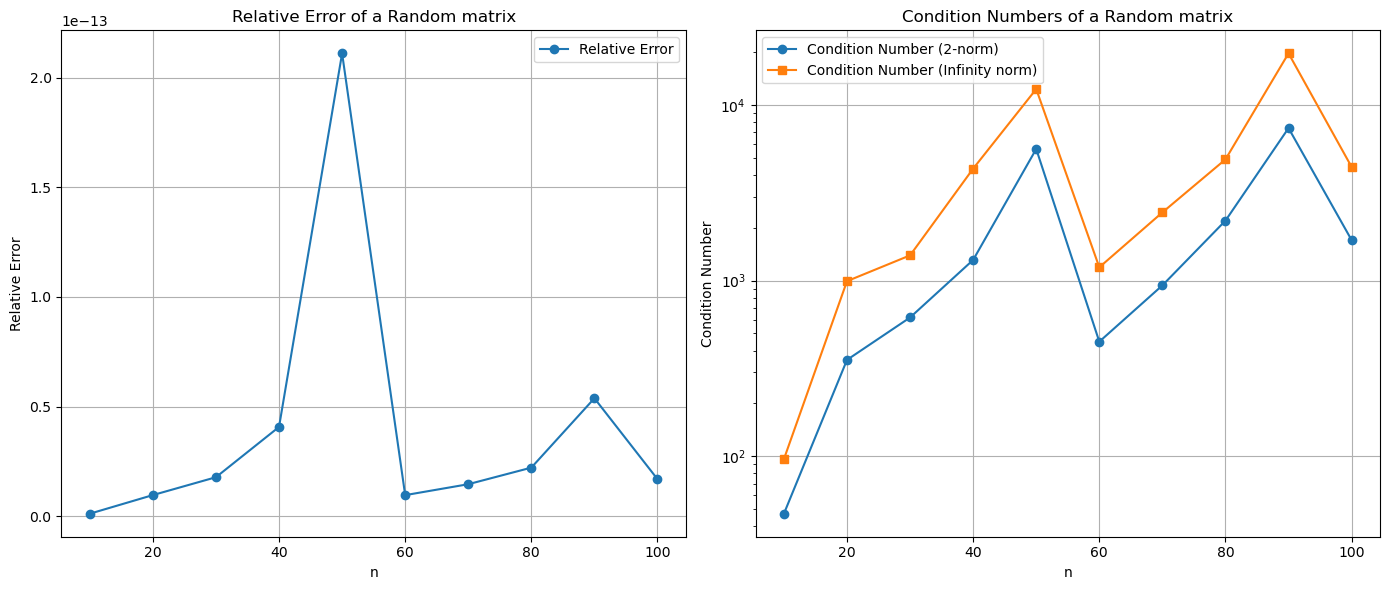

In [ ]:
# 2.1 Computation of a random matrix
random_n_values = list(range(10, 101, 10))    
res = {
    "n": [],
    "rel_error": [],
    "cond_2": [],
    "cond_inf": []
}

for n in random_n_values:
    print(f"n = {n}")
    A = np.random.rand(n, n)
    x_true = np.ones(n)
    
    cond_2, cond_inf, rel_err = compute_metrics(A, x_true)
    
    res["n"].append(n)
    res["rel_error"].append(rel_err)
    res["cond_2"].append(cond_2)
    res["cond_inf"].append(cond_inf)
    
    print(f"2-norm condition number: {cond_2}")
    print(f"Infinity-norm condition number: {cond_inf}")
    print(f"Relative error: {rel_err}")

# 1.5 Plot results
plot_results(res, "Random")

n = 5
2-norm condition number: 686.4349418186035
Infinity-norm condition number: 1706.6666666666647
Relative error: 4.939182472227543e-15
n = 10
2-norm condition number: 15193229.677066106
Infinity-norm condition number: 48183984.00019921
Relative error: 3.4176097408669165e-10
n = 15
2-norm condition number: 403235044819.3904
Infinity-norm condition number: 1605541876031.717
Relative error: 3.014531587013506e-06
n = 20
2-norm condition number: 1.14107038603285e+16
Infinity-norm condition number: 5.077018248039183e+16
Relative error: 0.07813811154410756
n = 25
2-norm condition number: 1.6326331118666255e+18
Infinity-norm condition number: 9.60256999114784e+20
Relative error: 655.0254897893874
n = 30
2-norm condition number: 7.44071973081943e+18
Infinity-norm condition number: 8.656364454736709e+22
Relative error: 26198.581941942593


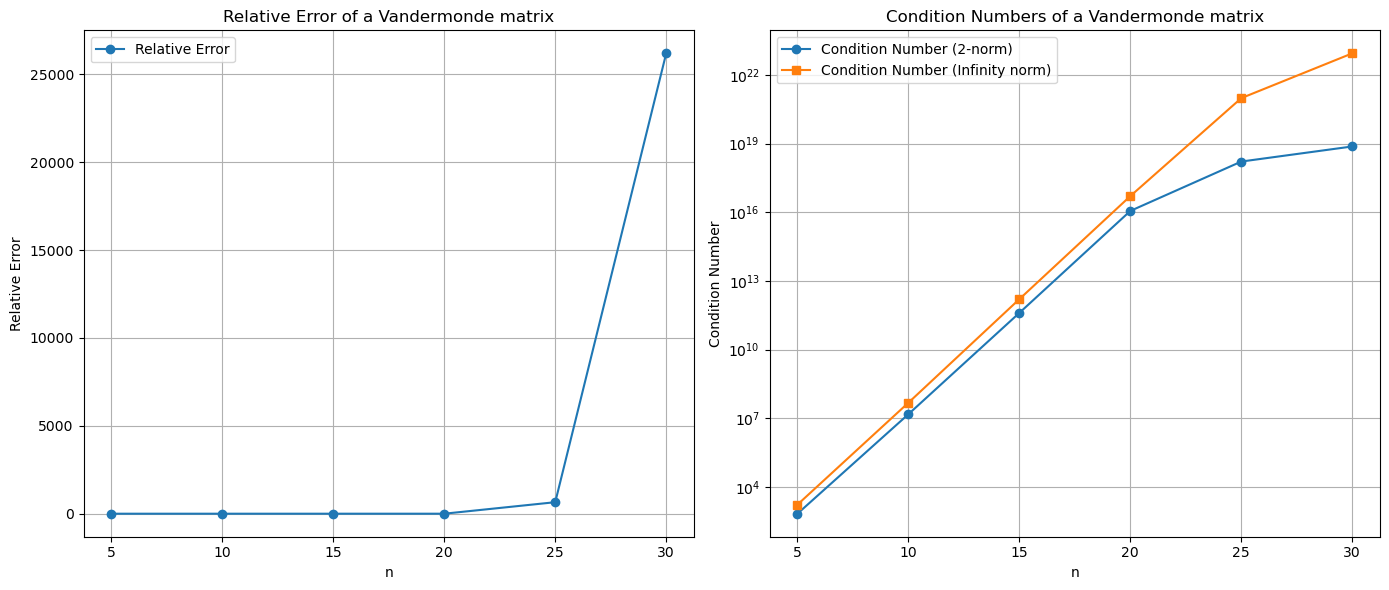

In [ ]:
# 2.2 Computation of a vandermonde matrix
vandermonde_n_values = list(range(5, 31, 5))
res = {
    "n": [],
    "rel_error": [],
    "cond_2": [],
    "cond_inf": []
}

for n in vandermonde_n_values:
    print(f"n = {n}")
    A = np.vander(np.linspace(0, 1, n), n)
    x_true = np.ones(n)
    
    cond_2, cond_inf, rel_err = compute_metrics(A, x_true)
    
    res["n"].append(n)
    res["rel_error"].append(rel_err)
    res["cond_2"].append(cond_2)
    res["cond_inf"].append(cond_inf)
    
    print(f"2-norm condition number: {cond_2}")
    print(f"Infinity-norm condition number: {cond_inf}")
    print(f"Relative error: {rel_err}")

# 1.5 Plot results
plot_results(res, "Vandermonde")

n = 4
2-norm condition number: 15513.738738928138
Infinity-norm condition number: 28374.999999997388
Relative error: 3.861787750251888e-13
n = 5
2-norm condition number: 476607.25024172297
Infinity-norm condition number: 943655.9999999335
Relative error: 3.782942176591251e-12
n = 6
2-norm condition number: 14951058.64080515
Infinity-norm condition number: 29070279.002940644
Relative error: 4.764069035605587e-10
n = 7
2-norm condition number: 475367356.91592133
Infinity-norm condition number: 985194889.719848
Relative error: 3.6914292198943105e-09
n = 8
2-norm condition number: 15257575252.823627
Infinity-norm condition number: 33872790819.49471
Relative error: 2.685641344606372e-07
n = 9
2-norm condition number: 493154382668.9694
Infinity-norm condition number: 1099650991701.052
Relative error: 1.8137285075715115e-05
n = 10
2-norm condition number: 16024573626355.164
Infinity-norm condition number: 35353724553756.43
Relative error: 0.0002596222657991884
n = 11
2-norm condition number: 

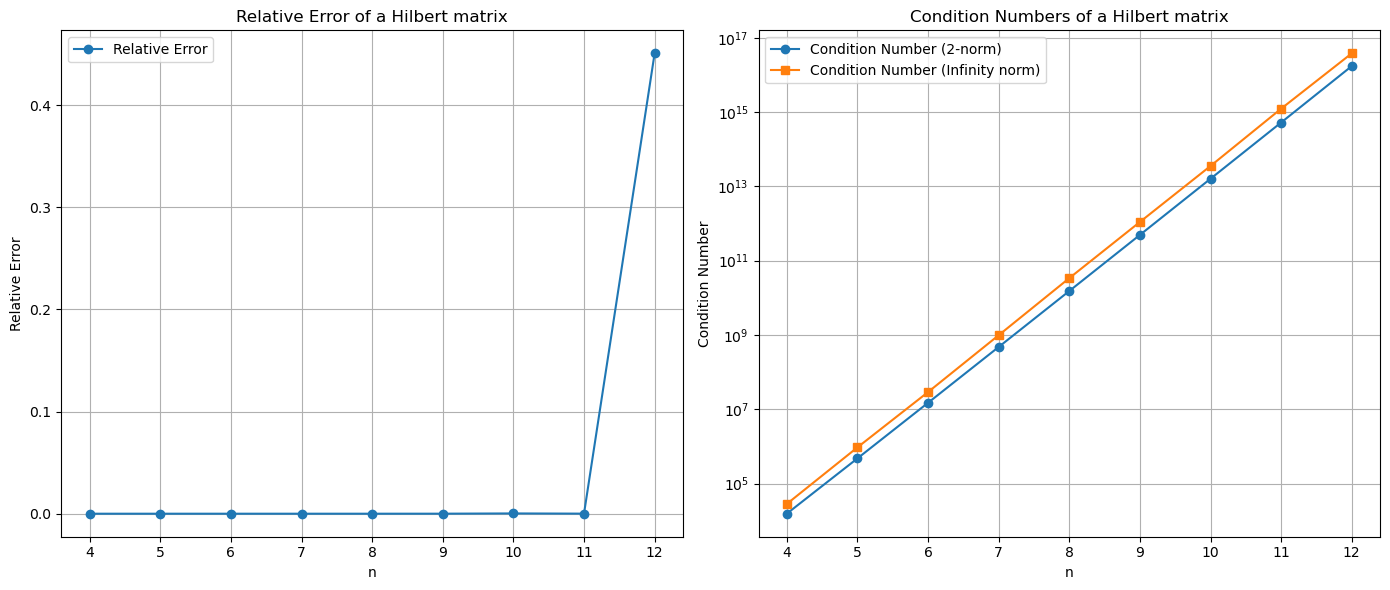

In [ ]:
# 2.3 Computation of an Hilbert matrix

hilbert_n_values = list(range(4, 13))
res = {
    "n": [],
    "rel_error": [],
    "cond_2": [],
    "cond_inf": []
}

for n in hilbert_n_values:
    print(f"n = {n}")
    A = hilbert(n)
    x_true = np.ones(n)
    
    # Compute metrics for the given matrix size
    cond_2, cond_inf, rel_err = compute_metrics(A, x_true)
    
    # Store metrics in results
    res["n"].append(n)
    res["rel_error"].append(rel_err)
    res["cond_2"].append(cond_2)
    res["cond_inf"].append(cond_inf)
    
    print(f"2-norm condition number: {cond_2}")
    print(f"Infinity-norm condition number: {cond_inf}")
    print(f"Relative error: {rel_err}")

# 1.5 Plot results
plot_results(res, "Hilbert")

# HW 1: Floating Point Arithmetic

### 1 Compute Machine Epsilon

In the following experiment, the machine epsilon is determined by initializing a variable with a value of 1.0 and repeatedly dividing it by 2, this process continues until adding the resulting number to 1 no longer changes the outcome, the smallest number obtained that still affects the sum is referred to as the machine epsilon.

In [6]:
epsilon = 1
while 1 + epsilon > 1:
    epsilon /= 2

machine_epsilon = epsilon * 2
print("Machine Epsilon:", machine_epsilon)

Machine Epsilon: 2.220446049250313e-16


### 2: Compute $a_n = (1 + \frac{1}{n})^n$ and Compare with e

In this experiment, we aim to compute the value of $e$ using the sequence:
$$ a_n = (1+\frac{1}{n})^n $$
and observe how the result of the sequence behaves as $n$ increases towards infinity.


Approximations of e:
n = 10.0, a_n = 2.593742460100002, error = 0.124539368359043
n = 100.0, a_n = 2.704813829421528, error = 0.013467999037517
n = 1000.0, a_n = 2.716923932235594, error = 0.001357896223452
n = 10000.0, a_n = 2.718145926824926, error = 0.000135901634120
n = 100000.0, a_n = 2.718268237192297, error = 0.000013591266748
n = 1000000.0, a_n = 2.718280469095753, error = 0.000001359363292
n = 10000000.0, a_n = 2.718281694132082, error = 0.000000134326963
n = 100000000.0, a_n = 2.718281798347358, error = 0.000000030111687
n = 1000000000.0, a_n = 2.718282052011560, error = 0.000000223552515
n = 10000000000.0, a_n = 2.718282053234788, error = 0.000000224775742
n = 100000000000.0, a_n = 2.718282053357110, error = 0.000000224898065
n = 1000000000000.0, a_n = 2.718523496037238, error = 0.000241667578193
n = 10000000000000.0, a_n = 2.716110034086901, error = 0.002171794372144
n = 100000000000000.0, a_n = 2.716110034087023, error = 0.002171794372022
n = 1000000000000000.0, a_n = 3.0

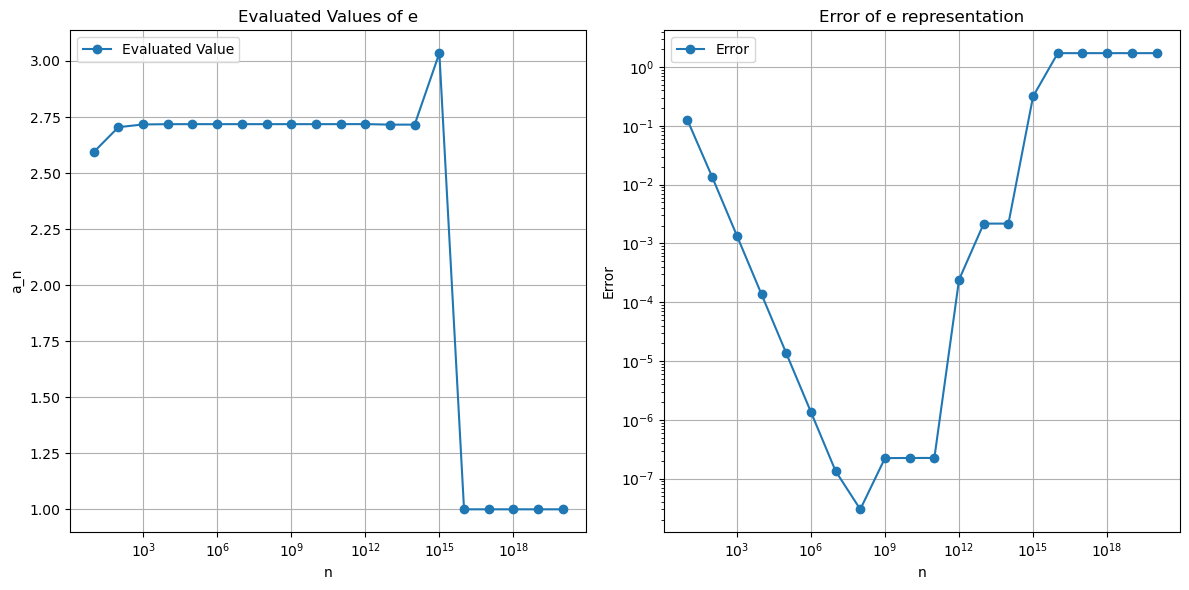

In [10]:
n_values = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16, 1e17, 1e18, 1e19, 1e20]
nepero_approximations = []

for n in n_values:
    a_n = (1 + 1/n)**n
    nepero_approximations.append((n, a_n, abs(np.e - a_n)))

print("\nApproximations of e:")
for n, a_n, error in nepero_approximations:
    print(f"n = {n}, a_n = {a_n:.15f}, error = {error:.15f}")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(n_values, [a_n for _, a_n, _ in nepero_approximations], 'o-', label="Evaluated Value")
axs[0].set_xscale('log')
axs[0].set_xlabel('n')
axs[0].set_ylabel('a_n')
axs[0].set_title('Evaluated Values of e')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(n_values, [error for _, _, error in nepero_approximations], 'o-', label="Error")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('n')
axs[1].set_ylabel('Error')
axs[1].set_title('Error of e representation')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

From the results, we can observe that the error decreases as $n$ increases, until it approaches the machine epsilon, beyond this point, the error begins to increase again due to the limitations of numerical precision in floating-point arithmetic.

### 3 Matrix Rank and Eigenvalues

In this last execise we evaluate the eigenvalues of the matrixes A and B, and wheather they are full-rank. A matrix is full-rank if its rank equals its smallest dimension, which corresponds to having no zero eigenvalues.

The code confirms the full-rank status of 𝐴 and 𝐵, showing their ranks, eigenvalues, and whether they meet the full-rank condition. Two additional examples illustrate: an identity matrix (full-rank) and a rank-deficient matrix with a zero eigenvalue.

In [8]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rank_A, eigenvalues_A = np.linalg.matrix_rank(A), np.linalg.eigvals(A)
rank_B, eigenvalues_B = np.linalg.matrix_rank(B), np.linalg.eigvals(B)

print("\nMatrix A:")
print("Rank:", rank_A)
print("Eigenvalues:", eigenvalues_A)

print("\nMatrix B:")
print("Rank:", rank_B)
print("Eigenvalues:", eigenvalues_B)

is_A_full_rank = np.linalg.matrix_rank(A) == min(A.shape)
is_B_full_rank = np.linalg.matrix_rank(B) == min(B.shape)

print("\nIs Matrix A full rank?:", is_A_full_rank)
print("Is Matrix B full rank?:", is_B_full_rank)

print("\nObservation:")
print("A matrix is full-rank if all its eigenvalues are non-zero.")
print("Matrix A eigenvalues:", eigenvalues_A, "- Full rank:", is_A_full_rank)
print("Matrix B eigenvalues:", eigenvalues_B, "- Full rank:", is_B_full_rank)

# Matrixes example
example_matrixes = [
    np.array([[1, 0], [0, 1]]),  # Full rank identity matrix
    np.array([[1, 2], [2, 4]])   # Not full rank
]

for i, matrix in enumerate(example_matrixes, 1):
    rank = np.linalg.matrix_rank(matrix)
    eigenvalues = np.linalg.eigvals(matrix)
    print(f"\nExample Matrix {i}:")
    print("Rank:", rank)
    print("Eigenvalues:", eigenvalues)
    print("Full Rank:", np.linalg.matrix_rank(matrix) == min(matrix.shape))



Matrix A:
Rank: 2
Eigenvalues: [5. 2.]

Matrix B:
Rank: 1
Eigenvalues: [5. 0.]

Is Matrix A full rank?: True
Is Matrix B full rank?: False

Observation:
A matrix is full-rank if all its eigenvalues are non-zero.
Matrix A eigenvalues: [5. 2.] - Full rank: True
Matrix B eigenvalues: [5. 0.] - Full rank: False

Example Matrix 1:
Rank: 2
Eigenvalues: [1. 1.]
Full Rank: True

Example Matrix 2:
Rank: 1
Eigenvalues: [0. 5.]
Full Rank: False
